## Machine learning Algorithm Trader

In this project, we will be using the OANDA v20 REST API  

<img style="float: left;" src="./images/api.png">




# Why forex over stocks?


![3advantage](./images/lvts.png)

### Liquidity  
The forex market is the largest and most liquid financial market. Daily activity often exceeds 4 trillion USD, with over 1.5 trillion of that conducted in the form of spot trading.


### Volatility  
Volatility boosts opportunity due to exchange rate fluctuations. Forex trading operates 24 hours a day, 5 days a week. The greatest liquidity occurs when operational hours in multiple time zones overlap.


### Tight Spreads  
Spreads in the forex market tend to be tighter (less), than the spreads applied to other, securities such as stocks. This makes OTC forex trading one of the most cost - effective means of investment trading.

In [212]:
#python packages required

# pip install v20  #OANDA V20 API
# pip install ujson
# pip install PyYAML
# pip install --index-url https://test.pypi.org/simple/ #tpqoa wrap up package

In [213]:
import pandas as pd
import numpy as np
import tpqoa
import matplotlib.pyplot as plt

In [214]:
#sensitive ID and password have been gitignored you will need to create your own config file 


api = tpqoa.tpqoa("oanda.cfg")

In [215]:
api.get_account_summary()

{'id': '101-003-23224294-001',
 'alias': 'Primary',
 'currency': 'SGD',
 'balance': '100140.8565',
 'createdByUserID': 23224294,
 'createdTime': '2022-09-13T12:16:27.974338285Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-126.8535',
 'resettablePL': '-126.8535',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.05',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 1,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '100140.8565',
 'marginUsed': '0.0',
 'marginAvailable': '100140.8565',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '100140.8565',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '100140.8565',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '115'}

In [216]:
#ensure the accunt type is the OANDA demo account
api.account_type

'practice'

In [217]:
api.account_id

'101-003-23224294-001'

In [218]:
api.get_instruments()

[('Copper', 'XCU_USD'),
 ('Wheat', 'WHEAT_USD'),
 ('NZD/SGD', 'NZD_SGD'),
 ('US SPX 500', 'SPX500_USD'),
 ('USD/NOK', 'USD_NOK'),
 ('UK 100', 'UK100_GBP'),
 ('AUD/NZD', 'AUD_NZD'),
 ('Silver', 'XAG_USD'),
 ('EUR/HUF', 'EUR_HUF'),
 ('Silver/EUR', 'XAG_EUR'),
 ('Litecoin', 'LTC_USD'),
 ('Silver/GBP', 'XAG_GBP'),
 ('NZD/USD', 'NZD_USD'),
 ('USD/CNH', 'USD_CNH'),
 ('CHF/ZAR', 'CHF_ZAR'),
 ('GBP/NZD', 'GBP_NZD'),
 ('US 10Y T-Note', 'USB10Y_USD'),
 ('Hong Kong 33', 'HK33_HKD'),
 ('US 5Y T-Note', 'USB05Y_USD'),
 ('US 2Y T-Note', 'USB02Y_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('US Russ 2000', 'US2000_USD'),
 ('US T-Bond', 'USB30Y_USD'),
 ('USD/CAD', 'USD_CAD'),
 ('ZAR/JPY', 'ZAR_JPY'),
 ('Silver/JPY', 'XAG_JPY'),
 ('Ether', 'ETH_USD'),
 ('SGD/JPY', 'SGD_JPY'),
 ('GBP/ZAR', 'GBP_ZAR'),
 ('USD/JPY', 'USD_JPY'),
 ('EUR/TRY', 'EUR_TRY'),
 ('Bitcoin', 'BTC_USD'),
 ('EUR/CZK', 'EUR_CZK'),
 ('EUR/JPY', 'EUR_JPY'),
 ('Taiwan Index', 'TWIX_USD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('Silver/NZD', 'XAG_NZD'),
 ('West T

In [219]:
instr = api.get_instruments()
len(instr)

129

There is a total of 12 instruments

## Getting Historical Data


In [220]:
#lets see how to use .get_history 
help(api.get_history)

Help on method get_history in module tpqoa.tpqoa:

get_history(instrument, start, end, granularity, price) method of tpqoa.tpqoa.tpqoa instance
    Retrieves historical data for instrument.
    
    Parameters
    instrument: string
        valid instrument name
    start, end: datetime, str
        Python datetime or string objects for start and end
    granularity: string
        a string like 'S5', 'M1' or 'D'
    price: string
        one of 'A' (ask) or 'B' (bid)
    
    Returns
    data: pd.DataFrame
        pandas DataFrame object with data



In [221]:
# df = api.get_history("EUR_USD", "2021-08-01", "2022-08-31", "M1", "A")

In [222]:
df = pd.read_csv('datasets/eur_usd.csv', parse_dates = ["time"], index_col = "time")

In [223]:
df.head() 

,volume,complete,open,high,low,close
time,,,,,,
2021-08-01 21:00:00+00:00,2,True,1.18673,1.18743,1.18673,1.18743
2021-08-01 21:02:00+00:00,2,True,1.18743,1.18743,1.18743,1.18743
2021-08-01 21:05:00+00:00,4,True,1.18721,1.18752,1.18673,1.18752
2021-08-01 21:10:00+00:00,4,True,1.18739,1.18752,1.18739,1.18752
2021-08-01 21:12:00+00:00,2,True,1.18743,1.18743,1.18734,1.18734


The data pulled has 7 columns,  
time, volume, complete, o, h, l, c,  
Lets rename them to make it easier to digest.


In [224]:

df = df.rename(columns={'o': 'open', 'h': 'high', 'l':'low', 'c': 'close'})


In [225]:
df.head()

,volume,complete,open,high,low,close
time,,,,,,
2021-08-01 21:00:00+00:00,2,True,1.18673,1.18743,1.18673,1.18743
2021-08-01 21:02:00+00:00,2,True,1.18743,1.18743,1.18743,1.18743
2021-08-01 21:05:00+00:00,4,True,1.18721,1.18752,1.18673,1.18752
2021-08-01 21:10:00+00:00,4,True,1.18739,1.18752,1.18739,1.18752
2021-08-01 21:12:00+00:00,2,True,1.18743,1.18743,1.18734,1.18734


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396575 entries, 2021-08-01 21:00:00+00:00 to 2022-08-30 23:59:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volume    396575 non-null  int64  
 1   complete  396575 non-null  bool   
 2   open      396575 non-null  float64
 3   high      396575 non-null  float64
 4   low       396575 non-null  float64
 5   close     396575 non-null  float64
dtypes: bool(1), float64(4), int64(1)
memory usage: 18.5 MB


In [227]:
#saving dataset to CSV 
# df.to_csv('datasets/eur_usd.csv', index=True)

In [228]:
plt.style.use("seaborn")

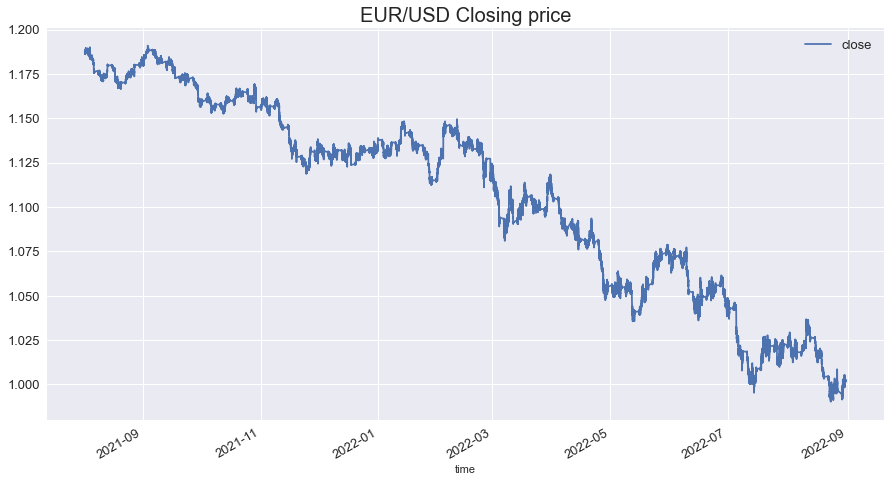

In [229]:
df.plot(y = "close", figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("EUR/USD Closing price", fontsize = 20)
plt.show()

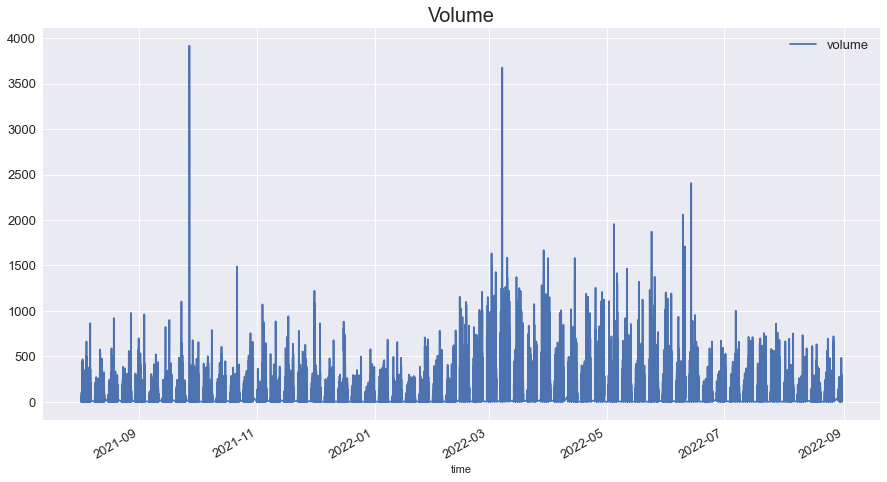

In [230]:
df.plot(y = "volume", figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("Volume", fontsize = 20)
plt.show()

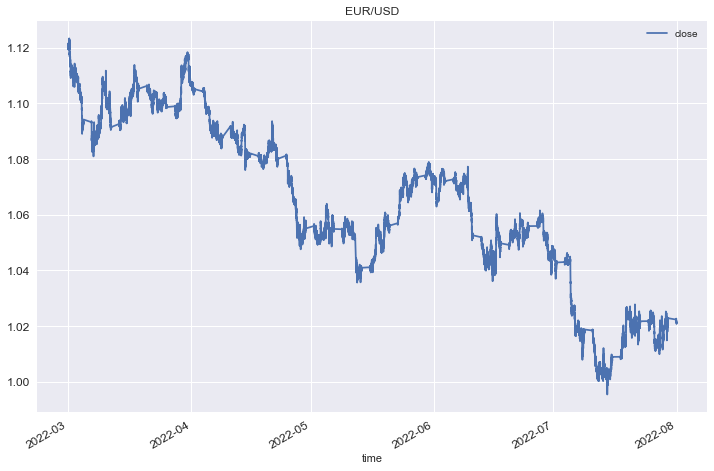

In [231]:
df.loc["2022-03" : "2022-07"].plot(y = "close",figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [249]:
#for the purpose of this project, we will be looking at only the closing price
close = df.close.to_frame()
close.head()

,close
time,
2021-08-01 21:00:00+00:00,1.18743
2021-08-01 21:02:00+00:00,1.18743
2021-08-01 21:05:00+00:00,1.18752
2021-08-01 21:10:00+00:00,1.18752
2021-08-01 21:12:00+00:00,1.18734


In [250]:
close["returns"] = np.log(close.div(close.shift(1)))

In [251]:
close.head()

,close,returns
time,,
2021-08-01 21:00:00+00:00,1.18743,NaN
2021-08-01 21:02:00+00:00,1.18743,0.000000
2021-08-01 21:05:00+00:00,1.18752,0.000076
2021-08-01 21:10:00+00:00,1.18752,0.000000
2021-08-01 21:12:00+00:00,1.18734,-0.000152


In [252]:
close=close.dropna()

In [253]:
close

,close,returns
time,,
2021-08-01 21:02:00+00:00,1.18743,0.000000
2021-08-01 21:05:00+00:00,1.18752,0.000076
2021-08-01 21:10:00+00:00,1.18752,0.000000
2021-08-01 21:12:00+00:00,1.18734,-0.000152
2021-08-01 21:30:00+00:00,1.18720,-0.000118
...,...,...
2022-08-30 23:55:00+00:00,1.00262,-0.000030
2022-08-30 23:56:00+00:00,1.00262,0.000000
2022-08-30 23:57:00+00:00,1.00255,-0.000070


## Streaming high-frequency real-time Data

In [71]:
# api.stream_data('EUR_USD', stop=20) 

2022-09-14T12:46:06.485065278Z 0.99983 0.99992
2022-09-14T12:46:07.202051582Z 0.99984 0.99994
2022-09-14T12:46:07.462142626Z 0.99991 1.0
2022-09-14T12:46:07.617935760Z 0.99995 1.00005
2022-09-14T12:46:07.949039666Z 0.99991 1.00001
2022-09-14T12:46:08.485643475Z 0.99992 1.00003
2022-09-14T12:46:08.600025385Z 0.99995 1.00005
2022-09-14T12:46:09.051829192Z 0.99993 1.00003
2022-09-14T12:46:09.481146469Z 0.9999 1.0
2022-09-14T12:46:09.729002181Z 0.99994 1.00002
2022-09-14T12:46:09.948675266Z 0.99992 1.00002
2022-09-14T12:46:10.262377413Z 0.99995 1.00004
2022-09-14T12:46:10.734615566Z 0.99997 1.00007
2022-09-14T12:46:11.517587754Z 0.99995 1.00005
2022-09-14T12:46:12.259239429Z 0.9999 0.99999
2022-09-14T12:46:12.454799567Z 0.99987 0.99997
2022-09-14T12:46:12.722885118Z 0.99987 0.99997
2022-09-14T12:46:13.267069692Z 0.9999 0.99999
2022-09-14T12:46:13.480122872Z 0.99989 1.0
2022-09-14T12:46:13.980844177Z 0.99997 1.00008


## Creating Orders and Executing Trades

In [98]:
# help(api.create_order)

Help on method create_order in module tpqoa.tpqoa:

create_order(instrument, units, sl_distance=0.01) method of tpqoa.tpqoa.tpqoa instance
    Places order with Oanda.
    
    Parameters
    instrument: string
        valid instrument name
    units: int
        number of units of instrument to be bought
        (positive int, eg 'units=50')
        or to be sold (negative int, eg 'units=-100')
    sl_distance: float
        stop loss distance price, mandatory eg in Germany



In [97]:
# api.create_order(instrument = "EUR_USD", units = 100000, sl_distance= 0.1)



 {'id': '31', 'time': '2022-09-14T13:04:45.083778279Z', 'userID': 23224294, 'accountID': '101-003-23224294-001', 'batchID': '30', 'requestID': '43004598533797126', 'type': 'ORDER_FILL', 'orderID': '30', 'instrument': 'EUR_USD', 'units': '100000.0', 'gainQuoteHomeConversionFactor': '1.3978755', 'lossQuoteHomeConversionFactor': '1.4119245', 'price': 0.99998, 'fullVWAP': 0.99998, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 0.9999, 'liquidity': '1000000'}, {'price': 0.99989, 'liquidity': '2000000'}, {'price': 0.99988, 'liquidity': '2000000'}, {'price': 0.99986, 'liquidity': '5000000'}], 'asks': [{'price': 0.99998, 'liquidity': '1000000'}, {'price': 1.0, 'liquidity': '2000000'}, {'price': 1.00001, 'liquidity': '2000000'}, {'price': 1.00002, 'liquidity': '5000000'}], 'closeoutBid': 0.99986, 'closeoutAsk': 1.00002}, 'reason': 'MARKET_ORDER', 'pl': '8.3873', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100044.7412', 'tradesClosed': [{'tra

In [96]:
# api.create_order(instrument = "EUR_USD", units = -100000, sl_distance= 0.01)



 {'id': '28', 'time': '2022-09-14T13:03:54.422497715Z', 'userID': 23224294, 'accountID': '101-003-23224294-001', 'batchID': '27', 'requestID': '24990199812139123', 'type': 'ORDER_FILL', 'orderID': '27', 'instrument': 'EUR_USD', 'units': '-100000.0', 'gainQuoteHomeConversionFactor': '1.39778595', 'lossQuoteHomeConversionFactor': '1.41183405', 'price': 1.00004, 'fullVWAP': 1.00004, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.00004, 'liquidity': '1000000'}, {'price': 1.00003, 'liquidity': '2000000'}, {'price': 1.00002, 'liquidity': '2000000'}, {'price': 1.0, 'liquidity': '5000000'}], 'asks': [{'price': 1.00014, 'liquidity': '1000000'}, {'price': 1.00016, 'liquidity': '2000000'}, {'price': 1.00017, 'liquidity': '2000000'}, {'price': 1.00018, 'liquidity': '5000000'}], 'closeoutBid': 1.0, 'closeoutAsk': 1.00018}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100036.3539', 'tradeOpened': {'tradeID'

In [74]:
# api.get_account_summary()

{'id': '101-003-23224294-001',
 'alias': 'Primary',
 'currency': 'SGD',
 'balance': '100036.3539',
 'createdByUserID': 23224294,
 'createdTime': '2022-09-13T12:16:27.974338285Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-231.3561',
 'resettablePL': '-231.3561',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.05',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '100036.3539',
 'marginUsed': '0.0',
 'marginAvailable': '100036.3539',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '100036.3539',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '100036.3539',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '26'}

In [92]:
trade_record = api.get_transactions()

In [94]:
df1 = pd.DataFrame.from_dict(trade_record)
df1